## Red de unidades de umbral lineal

El XNOR es equivalente al si y sólo si, por lo cual se usará su equivalencia, expresado únicamente con AND, OR y NOT.
$p \odot q \equiv p \leftrightarrow q \equiv (p \land q) \lor (\lnot p \land \lnot q) \equiv (p \land q) \lor \lnot (p \lor q)$.

Primero se definirán:
* La función de escalón unitario y
* La neurona artificial con escalón unitario.

In [2]:
import numpy as np

In [3]:
def escalon(z):
    if z >= 0.0:
        return 1.0
    else:
        return 0.0

In [4]:
def neurona_eu(x, w, b):
    z = np.dot(w.T, x) + b
    return escalon(z)

## NOR $\lnot (p \lor q)$

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
|   0   |   0   |  1  |
|   0   |   1   |  0  |
|   1   |   0   |  0  |
|   1   |   1   |  0  |

Para aproximar la función NOR se pueden hacer las siguiente asignación $w = [-10, -10]$, $b=5$.

Se verifica:

In [5]:
X = np.array([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
w = np.array([-10.,-10.])
b = 5

print('----------------------')
print('x_1\tx_2\ty_hat')
print('----------------------')
for i in range(X.shape[0]):
    y_hat = neurona_eu(X[i,:].T, w, b)
    print('{0}\t{1}\t{2}'.format(X[i,0], X[i,1], y_hat))

----------------------
x_1	x_2	y_hat
----------------------
0.0	0.0	1.0
0.0	1.0	0.0
1.0	0.0	0.0
1.0	1.0	0.0


Para la función AND se tienen las asignaciones: $w=[10, 10], b = -15$

Para la función OR: $w=[10, 10], b=-5$

Combinando éstas, se puede construir la red neuronal para el si y sólo si ($\leftrightarrow$).

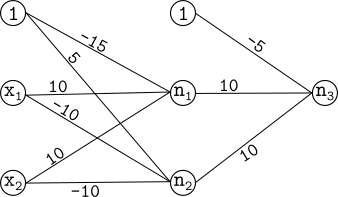

Definamos la función para el si y sólo si (syss) y probémosla.

In [6]:
def syss(x):
    W1 = np.array([[10,-10], [10,-10]])
    b1 = np.array([-15, 5])
    W2 = np.array([[10], [10]])
    b2 = np.array([-5])

    escv = np.vectorize(escalon)
    a = escv(np.dot(W1.T, x) + b1)
    return escv(np.dot(W2.T, a) + b2)

In [9]:
print('x_1\tx_2\ty_hat')
print('---------------------')
for i in range(X.shape[0]):
    y_hat = syss(X[i].T)
    print('{0}\t{1}\t{2}'.format(X[i, 0], X[i, 1], y_hat[0]))

x_1	x_2	y_hat
---------------------
0.0	0.0	1.0
0.0	1.0	0.0
1.0	0.0	0.0
1.0	1.0	1.0
